Please find below the Project for Recommendation Systems course. This is an individual assignment. Kindly submit it before it's deadline.<br>

Make new Product Recommendations<br>

Problem Statement -
Build your own recommendation system for products on an e-commerce website like Amazon.com.<br>

Dataset - ​ Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) ratings_Electronics_Ver3.tar.xz View in a new window (you may use winrar application to extract the .csv file)<br>

Dataset columns - first three columns are userId, productId, and ratings and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.<br>

o The repository has several datasets. For this case study, please use the Electronics dataset.<br>
o The host page has several pointers to scripts and other examples that can help with parsing the datasets.<br>
o The data set consists of:<br>
● 7,824,482 Ratings (1-5) for Electronics products.<br>
● Other metadata about products. Please see the description of the fields available on the web page cited above.<br>

o For convenience of future use, parse the raw data file (using Python, for example) and extract the following fields: 'product/productId' as prod_id, 'product/title' as prod_name, 'review/userId' as user id, 'review/score' as rating<br>
o Save these to a tab separated file. Name this file as product_ratings.csv.

Steps -<br>
1. Read and explore the dataset. (Rename column, plot histograms, find data characteristics)<br>
2. Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 50 or more number of ratings )<br>
3. Split the data randomly into train and test dataset. (For example split it in 70/30 ratio)<br>
4. Build Popularity Recommender model.<br>
5. Build Collaborative Filtering model.<br>
6. Evaluate both the models. (Once the model is trained on the training data, it can be used to compute the error (RMSE) on predictions made on the test data.)<br>
7. Get top - K (K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits,we will recommend 5 new products.<br>
8. Summarise your insights.<br>

Mark Distributions -
Step - 1,2,3,8 - 5 marks each
Step - 4,5,6,7 - 10 marks each

In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Read and explore the dataset. (Rename column, plot histograms, find data characteristics)

In [2]:
# looking at the first five rows to know if there are any other specific text format present in the dataset
data_set= open('ratings_Electronics.csv','r')
print('\033[1mBook file structure\033[0m\n')
for i in range(0,5):
    print(data_set.readline())

Book file structure

AKM1MP6P0OYPR,0132793040,5.0,1365811200

A2CX7LUOHB2NDG,0321732944,5.0,1341100800

A2NWSAGRHCP8N5,0439886341,1.0,1367193600

A2WNBOD3WNDNKT,0439886341,3.0,1374451200

A1GI0U4ZRJA8WN,0439886341,1.0,1334707200



In [3]:
data_set=pd.read_csv('ratings_Electronics.csv',header=None)
data_set.head()

,0,1,2,3
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [4]:
data_set.columns=['reviewerID','productID','rating','reviewTime']
data_set.shape

(7824482, 4)

In [5]:
#dropping reviewTime
data_set=data_set.drop(columns=['reviewTime'])
data_set.head()

,reviewerID,productID,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
reviewerID    object
productID     object
rating        float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


,rating,count,prop
0,5.0,4347541,0.555633
1,4.0,1485781,0.189889
2,1.0,901765,0.115249
3,3.0,633073,0.080909
4,2.0,456322,0.058320


<function matplotlib.pyplot.show(*args, **kw)>

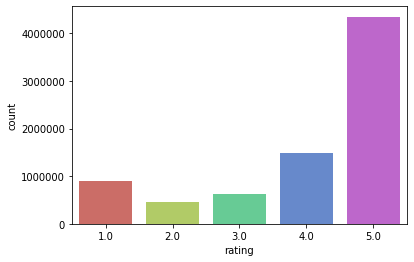

In [7]:
import seaborn as sns
from IPython.display import display
data_df=data_set
target_var='rating'

# ploting the data distribution for the target columns "class"
freq = data_df[target_var].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
display(freq)
sns.countplot(x=target_var,data=data_df,palette='hls')
plt.show

In [9]:
data_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
reviewerID,7824482,4201696,A5JLAU2ARJ0BO,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
productID,7824482,476002,B0074BW614,18244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,7.82448e+06,NaN,NaN,NaN,4.01234,1.38091,1,3,5,5,5


#### From the histogram and descptive stats, i can observe that
1) There are 42,01,696 unique reviewers. <br>
2) There are 4,76,002 unique products. <br>
3) Rating ranges from 1 to 5. <br>
4) Rating 4 and 5 are higher comparitive to other rating, however, each rating has comparivetly higher for analysis purpose.

### 2. Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 50 or more number of ratings )

In [8]:
reviewersgrt50 = pd.DataFrame(data_set.reviewerID.value_counts()>50)

In [9]:
reviewersgrt50=reviewersgrt50[reviewersgrt50.reviewerID==True]

In [10]:
data_df = pd.DataFrame(reviewersgrt50.index,columns=["reviewerID"])

In [11]:
display(data_df.head(), data_df.shape)

,reviewerID
0,A5JLAU2ARJ0BO
1,ADLVFFE4VBT8
2,A3OXHLG6DIBRW8
3,A6FIAB28IS79
4,A680RUE1FDO8B


(1466, 1)

In [12]:
data_set_50more = pd.merge(data_df,data_set,left_on='reviewerID',right_on='reviewerID',how='inner')

In [13]:
data_set_50more.shape

(122171, 3)

In [14]:
data_set_50more.head()

,reviewerID,productID,rating
0,A5JLAU2ARJ0BO,1400532655,1.0
1,A5JLAU2ARJ0BO,B00003006R,5.0
2,A5JLAU2ARJ0BO,B00003G1RG,3.0
3,A5JLAU2ARJ0BO,B00004S9AK,5.0
4,A5JLAU2ARJ0BO,B00004SB92,4.0


In [15]:
data_set_50more.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122171 entries, 0 to 122170
Data columns (total 3 columns):
reviewerID    122171 non-null object
productID     122171 non-null object
rating        122171 non-null float64
dtypes: float64(1), object(2)
memory usage: 3.7+ MB


In [16]:
data_set_50more.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
reviewerID,122171,1466,A5JLAU2ARJ0BO,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
productID,122171,47155,B0088CJT4U,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,122171,NaN,NaN,NaN,4.26262,1.05883,1,4,5,5,5


In [17]:
data_set_50more.isna().sum()

reviewerID    0
productID     0
rating        0
dtype: int64

### There are 1,466 reviewers who have provided 50 or more number of ratings, ranging from 1 to 5 rating with 1,221,71 observations on 47,155 products.

In [18]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))

In [19]:
data = Dataset.load_from_df(data_set_50more[['reviewerID', 'productID', 'rating']], reader)

In [20]:
data

In [41]:
from surprise import KNNWithMeans
from surprise import SVD
from surprise import accuracy
from surprise import Prediction
from surprise.model_selection import cross_validate

In [47]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), KNNWithMeans()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse') 

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,fit_time,test_time
Algorithm,,,
SVD,0.983559,9.081103,0.526011
KNNWithMeans,1.064142,0.218152,1.345086


### SVD algorithum gave best rmse, thus considered SVD for this project

### Spliting the dataset

In [21]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25,random_state=123)

In [22]:
type(trainset)

surprise.trainset.Trainset

Points to Note:
    
    1) Trainset is no longer a pandas dataframe. Rather, it's a specific datatypes defined by the Surprise library
    2) UserId and ItemId in the pandas dataframe can contain any value (either string/integer etc). However, Trainset convert these raw ids into numeric indexes called as "inner id"
    3) Methods are provided to convert rw id to inner id and vice verca

#### Training the model

In [24]:
#SVD
svd_model = SVD(n_factors=50,biased=False)
svd_model.fit(trainset)

In [25]:
test_pred = svd_model.test(testset)

In [26]:
test_pred_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in test_pred])

In [27]:
test_pred_df.head()

,0,1,2
0,ACP9S40H3SHY1,B004J1G2MQ,1.645075
1,A2BMZRO0H7TFCS,B00DVFLJDS,1.999791
2,A3SQCTNYQFVBWM,B003CQGSC8,4.263653
3,A1E1LEVQ9VQNK,B00AKONZ3U,5.000000
4,A2QDOJFFLFGF18,B00DQZQG3G,3.735240


In [28]:
test_pred_df.columns = ["reviewerID","productID","rating"]
test_pred_df.sort_values(by = ["reviewerID", "rating"],ascending=False,inplace=True)

In [29]:
test_pred_df.head()

,reviewerID,productID,rating
8833,AZOK5STV85FBJ,B001JT0CGI,4.263653
13627,AZOK5STV85FBJ,B0035TZS14,4.263653
17340,AZOK5STV85FBJ,B000H8WLKC,4.263653
18329,AZOK5STV85FBJ,B003B01AHS,4.263653
19397,AZOK5STV85FBJ,B0007WRQ4Y,4.263653


In [30]:
top_10_recos = test_pred_df.groupby("reviewerID").head(10).reset_index(drop=True)

In [31]:
top_10_recos.head(30)

,reviewerID,productID,rating
0,AZOK5STV85FBJ,B001JT0CGI,4.263653
1,AZOK5STV85FBJ,B0035TZS14,4.263653
2,AZOK5STV85FBJ,B000H8WLKC,4.263653
3,AZOK5STV85FBJ,B003B01AHS,4.263653
4,AZOK5STV85FBJ,B0007WRQ4Y,4.263653
5,AZOK5STV85FBJ,B000NNQO8Q,4.263653
6,AZOK5STV85FBJ,B000ERAOMS,4.263653
7,AZOK5STV85FBJ,B0002L5R78,2.820096
8,AZOK5STV85FBJ,B000O5N5AI,2.758936
9,AZOK5STV85FBJ,B00FB2XNCE,1.379333


In [32]:
# compute RMSE
accuracy.rmse(test_pred)

RMSE: 1.9935


1.9935044577728833